<a href="https://colab.research.google.com/github/AsmaShaikhTMU/Projects/blob/main/dataset_2_Initial_Results_and_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, fbeta_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

In [ ]:
# Load the New Dataset #2
# dataset 2

import pandas as pd  # Use pd instead of pd2

# Correct RAW URL
url = "https://raw.githubusercontent.com/AsmaShaikhTMU/Projects/main/diabetes_012_health_indicators_BRFSS2015.csv"

# Read CSV file
df2 = pd.read_csv(url)

# Display first few rows
df2.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#🔍 1. Inspect the Data
df2.info()
df2.describe()
df2['Diabetes_012'].value_counts()  # this is your target column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,count
Diabetes_012,
0.0,213703
2.0,35346
1.0,4631


In [ ]:
# Combine 0 and 1 (no diabetes + prediabetes) → 0, and diabetes (2) → 1
df2['Diabetes_012'] = df2['Diabetes_012'].replace({1.0: 1, 2.0: 1})


In [ ]:
print(df2['Diabetes_012'].value_counts())


Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64


The column Diabetes_012 has 3 classes:

0: no diabetes

1: prediabetes

2: diabetes

In [ ]:
# Display dataset info (column types, null values, memory usage)
print("\nDataset Info:")
df2.info()

# Check for duplicate rows
duplicate_count = df2.duplicated().sum()
duplicate_percent = (duplicate_count / len(df2)) * 100
print(f"\nDuplicate Rows Count: {duplicate_count}")
print(f"Percentage of Duplicates: {duplicate_percent:.2f}%")

# Print missing values per column
missing_per_column = df2.isnull().sum()
total_missing = missing_per_column.sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null

In [ ]:
df2 = df2.drop_duplicates()
print("✅ Duplicates removed.")
print("Remaining rows:", len(df2))

✅ Duplicates removed.
Remaining rows: 229712


In [ ]:
# List of columns you want to keep
columns_to_keep = [
    'Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker',
    'GenHlth', 'Age'
]

# Keep only those columns in df2
df2 = df2[columns_to_keep]


In [ ]:
# Display summary statistics of numerical columns
print("\nSummary Statistics:")
display(df2.describe())


Summary Statistics:


,Diabetes_012,HighBP,HighChol,BMI,Smoker,GenHlth,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.157588,0.429001,0.424121,28.382364,0.443169,2.511392,8.032119
std,0.364355,0.494934,0.494210,6.608694,0.496761,1.068477,3.054220
min,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,2.000000,6.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,2.000000,8.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,3.000000,10.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,5.000000,13.000000


# RF MODEL BASELINE



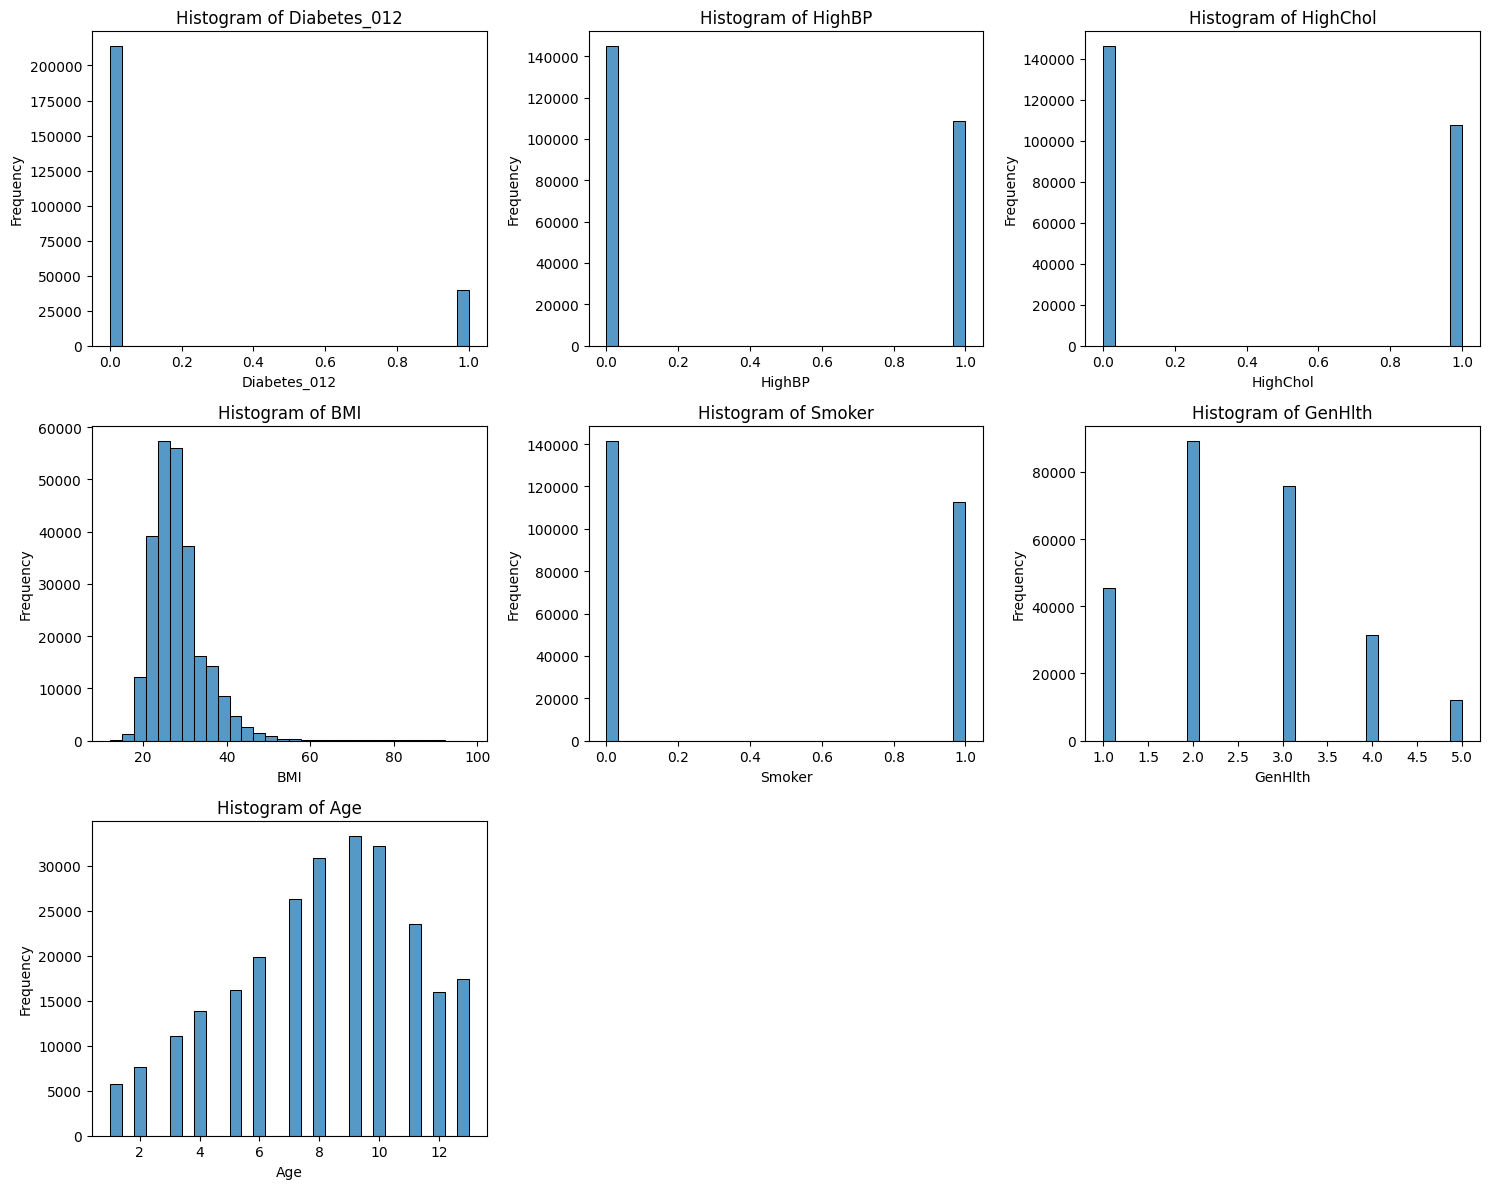

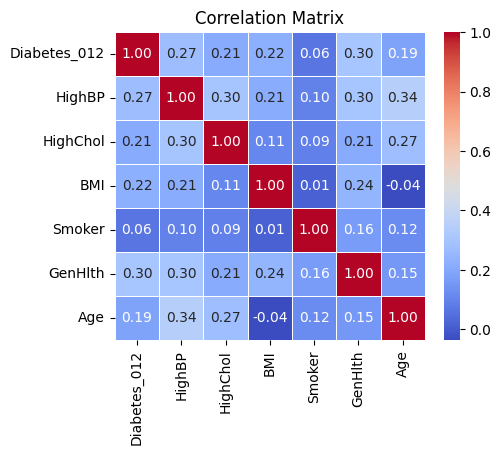

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected columns
columns_to_plot = ['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'GenHlth', 'Age']

# Histograms (all in one figure)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df2[col], bins=30, kde=False, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation heatmap
correlation_matrix = df2[columns_to_plot].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Calculate percentage of individuals with BMI > 30 who have diabetes (Diabetes_012 == 2)
diabetic_bmi = df2[(df2['BMI'] > 30) & (df2['Diabetes_012'] == 1)].shape[0]
total_bmi_above_30 = df2[df2['BMI'] > 30].shape[0]

if total_bmi_above_30 > 0:
    percentage_diabetic_bmi = (diabetic_bmi / total_bmi_above_30) * 100
    print(f"Percentage of individuals with BMI > 30 who have diabetes: {percentage_diabetic_bmi:.2f}%")
else:
    print("No individuals with BMI > 30 in the dataset.")



Percentage of individuals with BMI > 30 who have diabetes: 27.68%


In [ ]:
#High Blood Pressure (HighBP) vs Diabetes
diabetic_highbp = df2[(df2['HighBP'] == 1) & (df2['Diabetes_012'] == 1)].shape[0]
total_highbp = df2[df2['HighBP'] == 1].shape[0]

if total_highbp > 0:
    percentage_diabetic_highbp = (diabetic_highbp / total_highbp) * 100
    print(f"Percentage of individuals with HighBP who have diabetes: {percentage_diabetic_highbp:.2f}%")
else:
    print("No individuals with HighBP in the dataset.")


Percentage of individuals with HighBP who have diabetes: 27.12%


In [ ]:
print(df2['Diabetes_012'].value_counts())


Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64


In [ ]:
#High Cholesterol (HighChol) vs Diabetes
diabetic_highchol = df2[(df2['HighChol'] == 1) & (df2['Diabetes_012'] == 1)].shape[0]
total_highchol = df2[df2['HighChol'] == 1].shape[0]

if total_highchol > 0:
    percentage_diabetic_highchol = (diabetic_highchol / total_highchol) * 100
    print(f"Percentage of individuals with HighChol who have diabetes: {percentage_diabetic_highchol:.2f}%")
else:
    print("No individuals with HighChol in the dataset.")


Percentage of individuals with HighChol who have diabetes: 24.69%


Then continue with:

Train/test split

Preprocessing (scaling only — all columns are numeric here)

Model evaluation (Logistic, RF, etc.)

Cross-validation and tuning (just like you did in Dataset 1)

In [ ]:
# 1. Define features and target
X = df2.drop(columns='Diabetes_012')
y = df2['Diabetes_012']


In [ ]:
# 3. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Preprocessing pipeline (only scaling needed since all features are numeric)
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), X.columns)
])


In [ ]:
# 5. Define models
models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    #"Decision Tree": DecisionTreeClassifier(random_state=42),
    #"K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    #"Support Vector Machine": SVC(probability=True, random_state=42),
}

In [ ]:
# 6. Evaluation function
def evaluate_model(name, model):
    pipeline = make_pipeline(preprocessor, model)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\nModel: {name}")
    print(f"Mean CV F1 Score: {cv_scores.mean():.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


Model: Random Forest
Mean CV F1 Score: 0.2868
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     42795
         1.0       0.50      0.20      0.29      7941

    accuracy                           0.84     50736
   macro avg       0.68      0.58      0.60     50736
weighted avg       0.81      0.84      0.81     50736



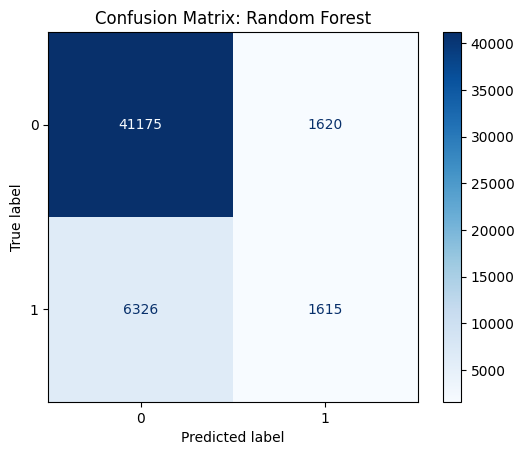

In [ ]:
# 7. Run evaluation for all models
for name, model in models.items():
    evaluate_model(name, model)


High precision for Logistic Regression (it’s cautious, but misses a lot of diabetics = low recall).

Decision Tree is a bit more balanced, but still weak.

KNN is heavily biased toward the majority class (0.0 = No Diabetes)

RF Very high performance on class 0, but...
Low recall on class 1 — meaning it's missing 83% of actual diabetes cases.
This model, like others, is impacted by class imbalance.

#TEST THE FINE TUNED RF MODEL

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd

# Define features and target
X = df2.drop(columns='Diabetes_012')
y = df2['Diabetes_012']

# 1. Preprocessing: scale all features
preprocessor = ColumnTransformer([
    ("scaler", StandardScaler(), X.columns)
])

# 2. Pipeline with Random Forest
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# 3. Hyperparameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10],
    'randomforestclassifier__min_samples_split': [2, 5]
}

# 4. GridSearchCV
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 5. Evaluate
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

print("\n✅ Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)

print("\n📋 Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 18 candidates, totalling 90 fits

✅ Best Hyperparameters for Random Forest:
{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}

📋 Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     42795
         1.0       0.50      0.20      0.29      7941

    accuracy                           0.84     50736
   macro avg       0.68      0.58      0.60     50736
weighted avg       0.81      0.84      0.81     50736



In [ ]:
X = df2.drop("Diabetes_012", axis=1)
y = df2["Diabetes_012"]

# 2. Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Set up preprocessor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical = X.select_dtypes(include='object').columns
numerical = X.select_dtypes(include='number').columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical)
])

# 4. Train pipeline with Random Forest
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
pipeline.fit(X_train, y_train)

# 5. Extract feature importances
model = pipeline.named_steps['randomforestclassifier']
importances = model.feature_importances_

# 6. Get feature names
all_feature_names = list(numerical)
if categorical.any():
    encoder = pipeline.named_steps['columntransformer'].named_transformers_['cat']
    all_feature_names += list(encoder.get_feature_names_out(categorical))

# 7. Create importance DataFrame
importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 8. Show top 5 features
print(importances_df.head(5))


    Feature  Importance
2       BMI    0.367629
4   GenHlth    0.223784
5       Age    0.167143
0    HighBP    0.156109
1  HighChol    0.070791


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define top 5 features again if needed
top_features = importances_df['Feature'].head(5).tolist()
X_top5 = X[top_features]

# Split the data
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_top5, y, test_size=0.2, random_state=42)

# Preprocessing for top-5
simpler_preprocessor = ColumnTransformer([
    ("num", StandardScaler(), top_features)
])

# Define and train pipeline
simpler_pipeline = make_pipeline(simpler_preprocessor, RandomForestClassifier(random_state=42))
simpler_pipeline.fit(X_train_top5, y_train_top5)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['BMI', 'GenHlth', 'Age',
                                                   'HighBP', 'HighChol'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
#Compare performance (accuracy, F1) between full vs top-5 models
#🧪 1. Compare Full vs. Top-5 Model

from sklearn.metrics import accuracy_score, f1_score

# Predictions
y_pred_full = pipeline.predict(X_test)
y_pred_top5 = simpler_pipeline.predict(X_test_top5)

# Metrics
full_accuracy = accuracy_score(y_test, y_pred_full)
full_f1 = f1_score(y_test, y_pred_full)

top5_accuracy = accuracy_score(y_test_top5, y_pred_top5)
top5_f1 = f1_score(y_test_top5, y_pred_top5)

# Summary table
import pandas as pd
performance_comparison = pd.DataFrame({
    "Model": ["Full Model", "Top-5 Model"],
    "Accuracy": [full_accuracy, top5_accuracy],
    "F1 Score": [full_f1, top5_f1]
})
print(performance_comparison)


         Model  Accuracy  F1 Score
0   Full Model  0.843385  0.289012
1  Top-5 Model  0.846500  0.281550


In [ ]:
#Add GridSearchCV for tuning this simplified model
# Do it for F2#
#🧪 2. Tune Top-5 Model with GridSearchCV
import pandas as pd
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

grid = GridSearchCV(simpler_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_top5, y_train_top5)

# Best model from grid search
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

# Metrics
tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
# Compute F2
from sklearn.metrics import fbeta_score
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)


# Add to summary
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned", tuned_accuracy, tuned_f1, tuned_f2
]
print("\n📊 Final Model Comparison:\n", performance_comparison)


📊 Final Model Comparison:
          Model  Accuracy        F1        F2
0  Top-5 Tuned  0.846224  0.283563  0.222395


In [ ]:
#tuned top 5 model
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 1. Create performance comparison DataFrame with correct structure
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

# 2. Define F2 scoring function
f2_scorer = make_scorer(fbeta_score, beta=2)

# 3. Define hyperparameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

# 4. Create GridSearchCV with pipeline
grid = GridSearchCV(
    simpler_pipeline,  # Your pipeline that includes preprocessor + RandomForest
    param_grid,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1
)

# 5. Fit the grid search on training data
grid.fit(X_train_top5, y_train_top5)

# 6. Get best model and predictions
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

# 7. Evaluate final tuned model
tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)

# 8. Add to performance comparison table
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned (F2)", tuned_accuracy, tuned_f1, tuned_f2
]

# 9. Print results
print("\n✅ Best Hyperparameters:", grid.best_params_)
print("\n📊 Final Model Comparison:\n", performance_comparison)



Fitting 5 folds for each of 9 candidates, totalling 45 fits

✅ Best Hyperparameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 50}

📊 Final Model Comparison:
               Model  Accuracy        F1        F2
0  Top-5 Tuned (F2)  0.846224  0.283563  0.222395


In [ ]:
# plus smote_pipeline
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  # 👈 Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define top-5 features (from your feature importance list)
top5_features = ["BMI", "GenHlth", "HighChol", "Age", "HighBP"]


# Identify types
top5_categorical = [col for col in top5_features if X_train_top5[col].dtype == 'object']
top5_numerical = [col for col in top5_features if X_train_top5[col].dtype != 'object']

# Define ColumnTransformer
preprocessor_top5 = ColumnTransformer([
    ("num", StandardScaler(), top5_numerical),
    ("cat", OneHotEncoder(handle_unknown='ignore'), top5_categorical)
])

# 1. Create performance comparison DataFrame
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

# 2. Define F2 scoring function
f2_scorer = make_scorer(fbeta_score, beta=2)

# 3. Define hyperparameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

# 🔧 Define the pipeline with SMOTE
smote_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_top5),  # Make sure this is defined before
    ('smote', SMOTE(random_state=42)),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# 4. Create GridSearchCV with pipeline
grid = GridSearchCV(
    smote_pipeline,
    param_grid,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1
)

# 5. Fit the grid search on training data
grid.fit(X_train_top5, y_train_top5)

# 6. Get best model and predictions
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

# 7. Evaluate final tuned model
tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)

# 8. Add to performance comparison table
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned + SMOTE (F2)", tuned_accuracy, tuned_f1, tuned_f2
]

# 9. Print results
print("\n✅ Best Hyperparameters:", grid.best_params_)
print("\n📊 Final Model Comparison:\n", performance_comparison)


Fitting 5 folds for each of 9 candidates, totalling 45 fits

✅ Best Hyperparameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 50}

📊 Final Model Comparison:
                       Model  Accuracy        F1        F2
0  Top-5 Tuned + SMOTE (F2)  0.718878  0.463696  0.611488


In [ ]:
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  # 👈 Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define top-5 features (from your feature importance list)
top5_features = ["BMI", "GenHlth", "HighChol", "Age", "HighBP"]

# Identify types
top5_categorical = [col for col in top5_features if X_train_top5[col].dtype == 'object']
top5_numerical = [col for col in top5_features if X_train_top5[col].dtype != 'object']

# Define ColumnTransformer
preprocessor_top5 = ColumnTransformer([
    ("num", StandardScaler(), top5_numerical),
    ("cat", OneHotEncoder(handle_unknown='ignore'), top5_categorical)
])

# 1. Create performance comparison DataFrame
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

# 2. Define F2 scoring function
f2_scorer = make_scorer(fbeta_score, beta=2)

# 3. Define hyperparameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

# 🔧 Define the pipeline with SMOTE
smote_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_top5),  # Make sure this is defined before
    ('smote', SMOTE(random_state=42)),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# 4. Create GridSearchCV with pipeline
grid = GridSearchCV(
    smote_pipeline,
    param_grid,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1
)

# 5. Fit the grid search on training data
grid.fit(X_train_top5, y_train_top5)

# 6. Get best model and predictions
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

# 7. Evaluate final tuned model
tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)

# 8. Add to performance comparison table
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned + SMOTE (F2)", tuned_accuracy, tuned_f1, tuned_f2
]

# 9. Print results
print("\n✅ Best Hyperparameters:", grid.best_params_)
print("\n📊 Final Model Comparison:\n", performance_comparison)


Fitting 5 folds for each of 9 candidates, totalling 45 fits

✅ Best Hyperparameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 50}

📊 Final Model Comparison:
                       Model  Accuracy        F1        F2
0  Top-5 Tuned + SMOTE (F2)  0.718878  0.463696  0.611488


In [ ]:
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  # 👈 Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define top-5 features (from your feature importance list)
top5_features = ["BMI", "GenHlth", "HighChol", "Age", "HighBP"]

# Identify types
top5_categorical = [col for col in top5_features if X_train_top5[col].dtype == 'object']
top5_numerical = [col for col in top5_features if X_train_top5[col].dtype != 'object']

# Define ColumnTransformer
preprocessor_top5 = ColumnTransformer([
    ("num", StandardScaler(), top5_numerical),
    ("cat", OneHotEncoder(handle_unknown='ignore'), top5_categorical)
])

# 1. Create performance comparison DataFrame
performance_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1", "F2"])

# 2. Define F2 scoring function
f2_scorer = make_scorer(fbeta_score, beta=2)

# 3. Define hyperparameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

# 🔧 Define the pipeline with SMOTE
smote_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_top5),  # Make sure this is defined before
    ('smote', SMOTE(random_state=42)),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# 4. Create GridSearchCV with pipeline
grid = GridSearchCV(
    smote_pipeline,
    param_grid,
    cv=10,
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1
)

# 5. Fit the grid search on training data
grid.fit(X_train_top5, y_train_top5)

# 6. Get best model and predictions
best_top5_pipeline = grid.best_estimator_
y_pred_top5_tuned = best_top5_pipeline.predict(X_test_top5)

# 7. Evaluate final tuned model
tuned_accuracy = accuracy_score(y_test_top5, y_pred_top5_tuned)
tuned_f1 = f1_score(y_test_top5, y_pred_top5_tuned)
tuned_f2 = fbeta_score(y_test_top5, y_pred_top5_tuned, beta=2)

# 8. Add to performance comparison table
performance_comparison.loc[len(performance_comparison)] = [
    "Top-5 Tuned + SMOTE (F2)", tuned_accuracy, tuned_f1, tuned_f2
]

# 9. Print results
print("\n✅ Best Hyperparameters:", grid.best_params_)
print("\n📊 Final Model Comparison:\n", performance_comparison)


Fitting 10 folds for each of 9 candidates, totalling 90 fits

✅ Best Hyperparameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}

📊 Final Model Comparison:
                       Model  Accuracy        F1        F2
0  Top-5 Tuned + SMOTE (F2)  0.718701  0.463136  0.610629
